In [2]:
import ast 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
from matplotlib.ticker import FuncFormatter
import seaborn as sns 
#loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # to change job skill list into data type

In [3]:
#filter for US Data Analyst roles
df_DA_US = df[(df['job_country'] == 'United States') &(df['job_title_short'] == 'Data Analyst')]

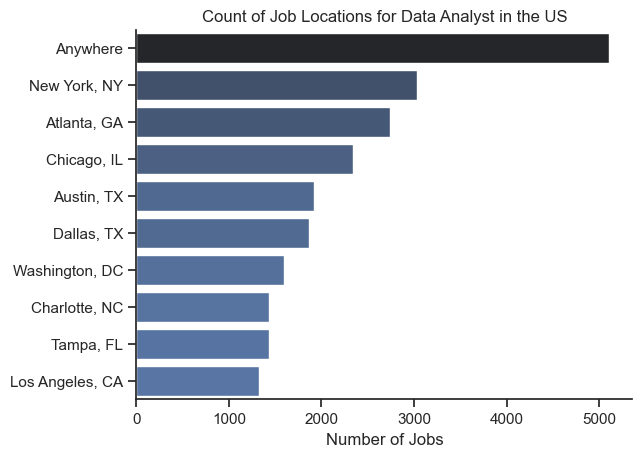

In [4]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y= 'job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine() #to remove border line
plt.title('Count of Job Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

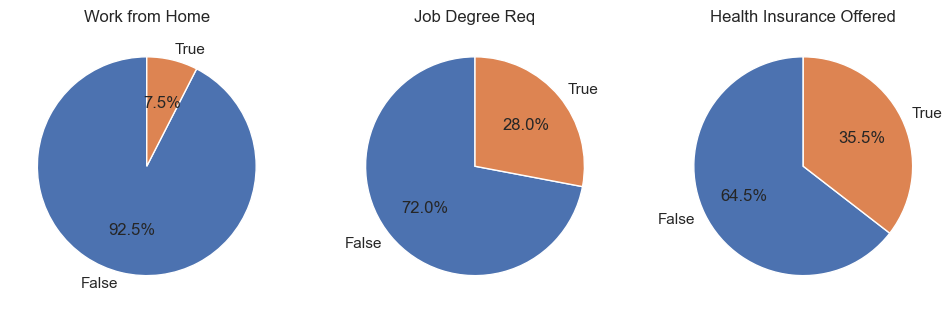

In [5]:
#Job Opportunities
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12,5))

dic_column = {
    'job_work_from_home': 'Work from Home', 
    'job_no_degree_mention': 'Job Degree Req',
    'job_health_insurance': "Health Insurance Offered"
}

for i, (column, title) in enumerate(dic_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.1f%%', labels= ['False', 'True'])
    ax[i].set_title(title)
plt.show()   

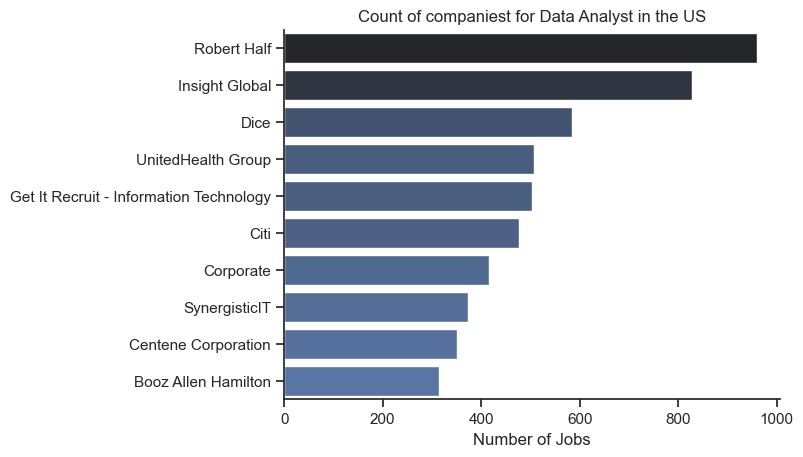

In [6]:
#Companies to Explore:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y= 'company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine() #to remove border line
plt.title('Count of companiest for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()